In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import itertools
%matplotlib inline

A) Brute Force algorithm

In [2]:
G = nx.read_gexf('graphs01234/graph_0005_01234.gexf', node_type=int)

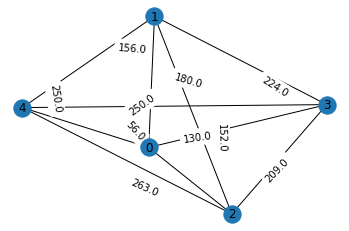

In [3]:
V = G.nodes

labels = nx.get_edge_attributes(G,'weight')
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw(G,with_labels=True)

In [4]:
#brute force algorithm
def brute_force(k,G):
    V = G.nodes
    comb = itertools.combinations(V, k)
    l=list(comb)
    g=0
    best=0
    for k in l:
        path = nx.multi_source_dijkstra_path_length(G, k)
        obj_value=max(path.values())
        if obj_value<g or g==0:
            g=obj_value
            best=k
    print("one of the best solutions is centers:",best)
    print("with max value",g)
    return best

In [5]:
def draw_k_centers_graph(G, centers = None):
    pos = nx.kamada_kawai_layout(G)

    if centers == None:
        node_color = list(itertools.repeat('yellow', len(G.nodes)))
    else:
        node_color = []
        for node in G:
            if node in centers:
                node_color.append('red')
            else:
                node_color.append('yellow')
    nx.draw(G, pos, node_color = node_color, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

one of the best solutions is centers: (0, 1, 2)
with max value 130.0


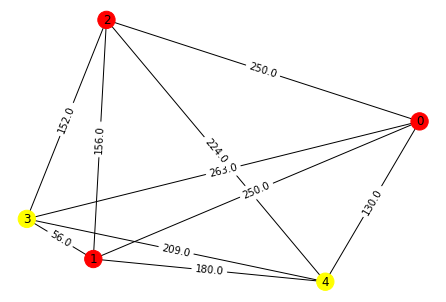

In [6]:
draw_k_centers_graph(G,brute_force(3,G))

one of the best solutions is centers: (1, 2, 7)
with max value 201.0


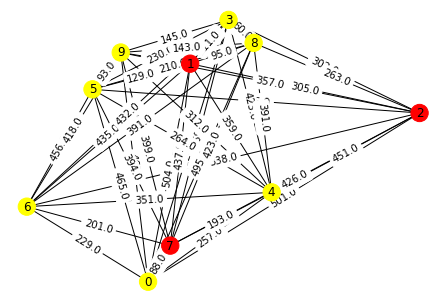

In [7]:
G10 = nx.read_gexf('graphs01234/graph_0010_01234.gexf', node_type=int)
draw_k_centers_graph(G10,brute_force(3,G10))

In [8]:
# Χρονομέτρηση της εκτέλεσης υπολογισμών
from timeit import default_timer
execution_time = {'2':0,'3':0,'4':0,'5':0}

one of the best solutions is centers: (13, 16, 18)
with max value 390.0


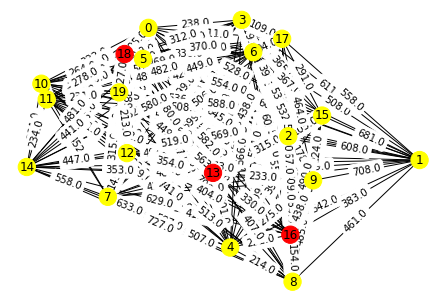

In [9]:
G20 = nx.read_gexf('graphs01234/graph_0020_01234.gexf', node_type=int)
draw_k_centers_graph(G20,brute_force(3,G20))

one of the best solutions is centers: (5, 14, 48)
with max value 639.0


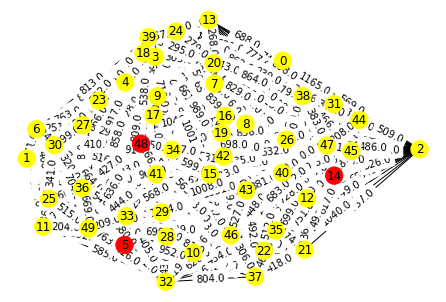

In [10]:
G50 = nx.read_gexf('graphs01234/graph_0050_01234.gexf', node_type=int)
draw_k_centers_graph(G50,brute_force(3,G50))

one of the best solutions is centers: (8, 16)
with max value 557.0


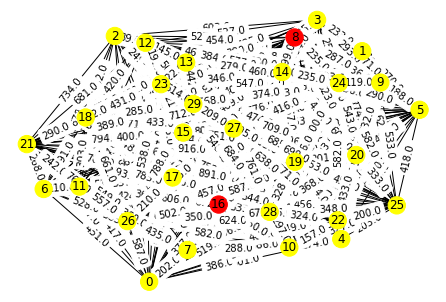

In [11]:
start = default_timer()
G30 = nx.read_gexf('graphs01234/graph_0030_01234.gexf', node_type=int)
draw_k_centers_graph(G30,brute_force(2,G30))
end = default_timer()
execution_time['2'] = end - start

one of the best solutions is centers: (1, 15, 16)
with max value 493.0


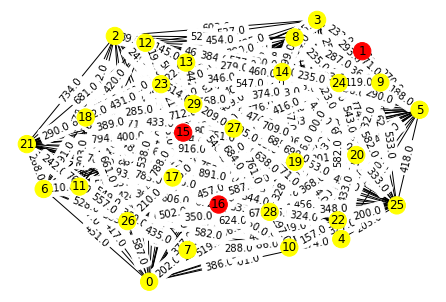

In [12]:
start = default_timer()
G30 = nx.read_gexf('graphs01234/graph_0030_01234.gexf', node_type=int)
draw_k_centers_graph(G30,brute_force(3,G30))
end = default_timer()
execution_time['3'] = end - start

one of the best solutions is centers: (11, 12, 24, 28)
with max value 417.0


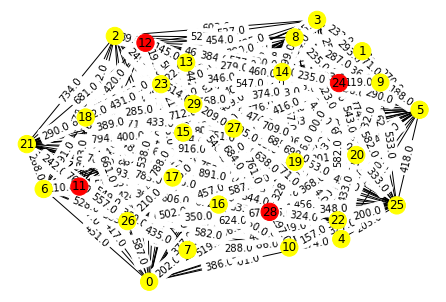

In [13]:
start = default_timer()
G30 = nx.read_gexf('graphs01234/graph_0030_01234.gexf', node_type=int)
draw_k_centers_graph(G30,brute_force(4,G30))
end = default_timer()
execution_time['4'] = end - start

one of the best solutions is centers: (1, 7, 13, 28, 29)
with max value 389.0


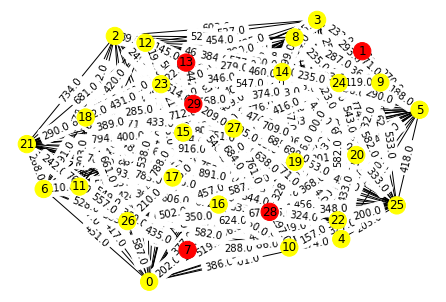

In [15]:
start = default_timer()
G30 = nx.read_gexf('graphs01234/graph_0030_01234.gexf', node_type=int)
draw_k_centers_graph(G30,brute_force(5,G30))
end = default_timer()
execution_time['5'] = end - start

In [16]:
d = {int(k):float(v) for k,v in execution_time.items()}

x = list(d.keys())
y = list(d.values())

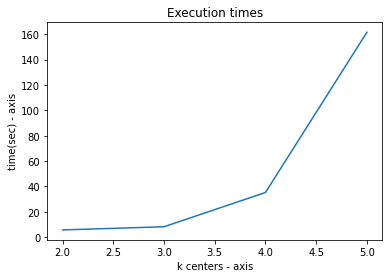

{2: 5, 3: 8, 4: 35, 5: 161}

In [17]:
plt.xlabel('k centers - axis')
plt.ylabel('time(sec) - axis')
plt.title('Execution times')
plt.plot(x, y)
plt.show()
d = {int(k):int(v) for k,v in d.items()}
d

In [18]:
def brute_force_optim(k,G):
    V = G.nodes
    # comb = itertools.combinations(V, k)
    # l=list(comb)
    # return l
    g=0
    best=0
    for k in itertools.combinations(V, k):#k is our current combination
        path = nx.multi_source_dijkstra_path_length(G, k)
        obj_value=max(path.values())
        if obj_value<g or g==0:
            g=obj_value
            best=k
            print("current best solution is :",best)
            print("with max value",g)
    print("one of the best solutions is centers:",best)
    print("with max value",g)
    return best

In [ ]:
# G146 = nx.read_gexf('graphs01234/graph_0146_01234.gexf', node_type=int)
# draw_k_centers_graph(G146,brute_force_optim(13,G146))
# # NO SOLUTION

In [ ]:
# G500 = nx.read_gexf('graphs01234/graph_0500_01234.gexf', node_type=int)
# draw_k_centers_graph(G500,brute_force_optim(13,G500))
# #NO SOLUTION

B) Greedy Algorithm

In [44]:
G = nx.read_gexf('graphs01234/graph_0005_01234.gexf', node_type=int)

In [45]:
def cost_calculation(G,nodes):
    path = nx.multi_source_dijkstra_path_length(G, nodes)
    obj_value=max(path.values())
    return obj_value

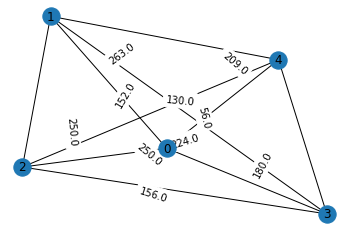

In [46]:
labels = nx.get_edge_attributes(G,'weight')
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw(G,with_labels=True)

In [47]:
def get_next_node(G,nodes): # get the farthest node as the next node 
    path = nx.multi_source_dijkstra_path_length(G, nodes)
#     print(path)
    #delete already added centers from nodes
    path = remove_from_dict(nodes,path)

    for node, value in path.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
        if value == max(path.values()):
#             print('Next node is ',node)
            return node
# get_next_node(G,[10],[29,2,3,12,8])

def get_2r_nodes(G,node):
    path = nx.multi_source_dijkstra_path_length(G, range(node))
    print(path)

In [48]:
def greedy_algorithm(k,G):
    S_compl = G.nodes
    S = S_compl

    cost=0
    centers=[]

    #first selection of center - pick randomly
    centers.append(random.choice(list(S_compl)))
#     print('Centers ', centers)
    #rest of centers
    for i in range(len(centers),k):# add farthest centers to centers list
        next_node = get_next_node(G,centers)
        centers.append(next_node)
    print('Centers ', centers)
    cost = cost_calculation(G,centers)
    print('Cost is ', cost)
    return centers

# greedy_algorithm(3,G)

In [49]:
# nx.multi_source_dijkstra_path_length(G,[10])

In [50]:
# get_next_node(G,(0,1),(4))

In [51]:
def remove_from_dict(entries, the_dict):
    if type(entries) == int:
        del the_dict[entries]
    else:
        for key in entries:
            if key in the_dict:
                del the_dict[key]
    return the_dict
# remove_from_dict(nodes_to_drop,dictionary)

Centers  [0, 3, 2]
Cost is  130.0


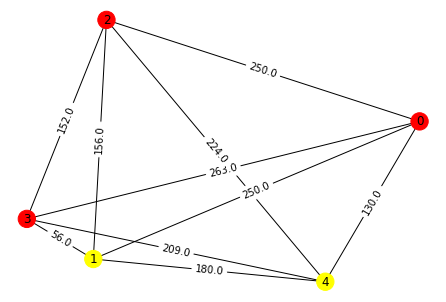

In [52]:
draw_k_centers_graph(G,greedy_algorithm(3,G))

Centers  [9, 0, 2]
Cost is  257.0


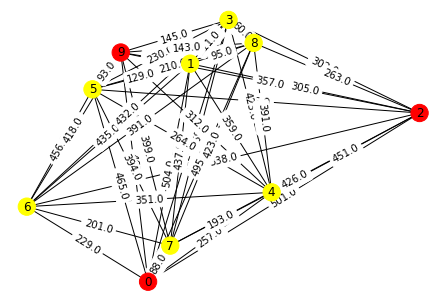

In [53]:
G10 = nx.read_gexf('graphs01234/graph_0010_01234.gexf', node_type=int)
draw_k_centers_graph(G10,greedy_algorithm(3,G10))

In [54]:
# Χρονομέτρηση της εκτέλεσης υπολογισμών
from timeit import default_timer
execution_time = {'2':0,'3':0,'4':0,'5':0}

Centers  [13, 1, 0]
Cost is  458.0


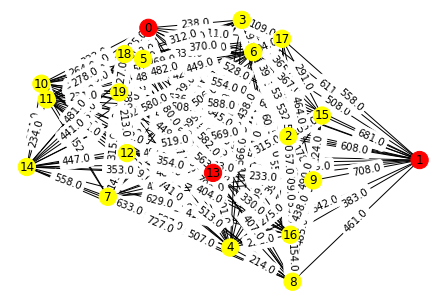

In [55]:
G20 = nx.read_gexf('graphs01234/graph_0020_01234.gexf', node_type=int)
draw_k_centers_graph(G20,greedy_algorithm(3,G20))

Centers  [3, 37, 2]
Cost is  935.0


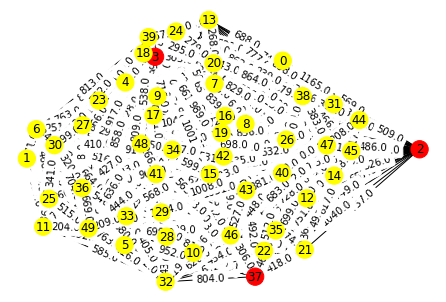

In [56]:
G50 = nx.read_gexf('graphs01234/graph_0050_01234.gexf', node_type=int)
draw_k_centers_graph(G50,greedy_algorithm(3,G50))

Centers  [2, 0]
Cost is  767.0


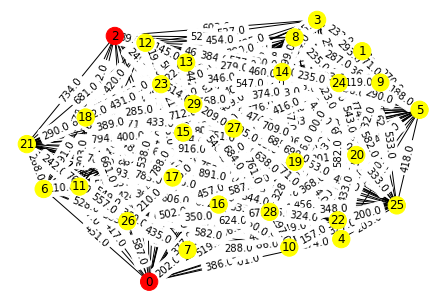

In [57]:
start = default_timer()
G30 = nx.read_gexf('graphs01234/graph_0030_01234.gexf', node_type=int)
draw_k_centers_graph(G30,greedy_algorithm(2,G30))
end = default_timer()
execution_time['2'] = end - start

Centers  [21, 19, 3]
Cost is  603.0


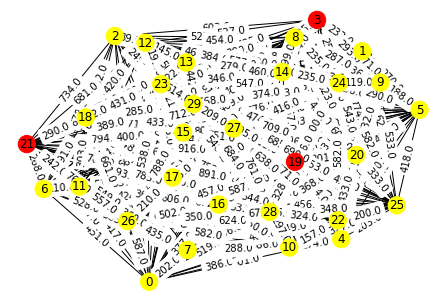

In [58]:
start = default_timer()
G30 = nx.read_gexf('graphs01234/graph_0030_01234.gexf', node_type=int)
draw_k_centers_graph(G30,greedy_algorithm(3,G30))
end = default_timer()
execution_time['3'] = end - start

Centers  [26, 3, 21, 25]
Cost is  603.0


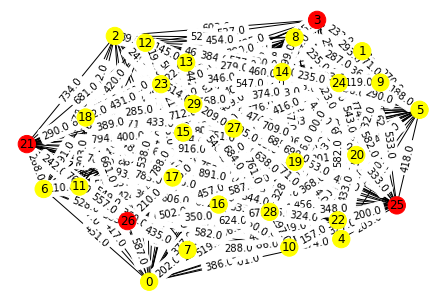

In [59]:
start = default_timer()
G30 = nx.read_gexf('graphs01234/graph_0030_01234.gexf', node_type=int)
draw_k_centers_graph(G30,greedy_algorithm(4,G30))
end = default_timer()
execution_time['4'] = end - start

Centers  [22, 2, 21, 1, 26]
Cost is  516.0


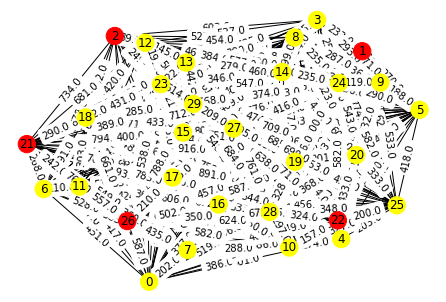

In [60]:
start = default_timer()
G30 = nx.read_gexf('graphs01234/graph_0030_01234.gexf', node_type=int)
draw_k_centers_graph(G30,greedy_algorithm(5,G30))
end = default_timer()
execution_time['5'] = end - start

In [61]:
d = {int(k):float(v) for k,v in execution_time.items()}

x = list(d.keys())
y = list(d.values())

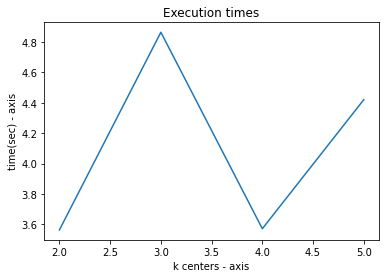

In [62]:
plt.xlabel('k centers - axis')
plt.ylabel('time(sec) - axis')
plt.title('Execution times')
plt.plot(x, y)
plt.show()

Centers  [2, 1, 24, 125, 86, 38, 136, 65, 85, 28, 84, 57, 52]
Cost is  875.0


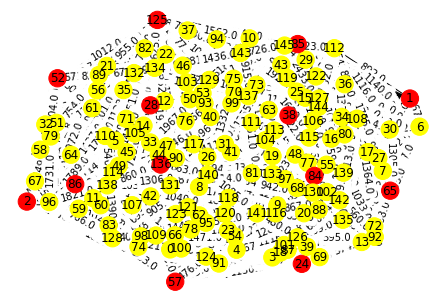

In [63]:
G146 = nx.read_gexf('graphs01234/graph_0146_01234.gexf', node_type=int)
draw_k_centers_graph(G146,greedy_algorithm(13,G146))
# NO SOLUTION

In [ ]:
G500 = nx.read_gexf('graphs01234/graph_0500_01234.gexf', node_type=int)
draw_k_centers_graph(G500,greedy_algorithm(13,G500))
#NO SOLUTION

Centers  [95, 333, 250, 346, 40, 0, 386, 89, 448, 238, 55, 222, 159]
Cost is  2303.0


multi_source_dijkstra_path_length(G, sources, cutoff=None, weight='weight')

Find shortest weighted path lengths in G from a given set of source nodes.
Compute the shortest path length between any of the source nodes and all other reachable nodes for a weighted graph.



lab2_code kai alles pipes apo edo kai kato

In [ ]:
# import networkx as nx
# import random
# import itertools

# # Δημιουργία πλήρους γράφου
# G = nx.complete_graph(5)

# # Δημιουργία γεννήτριας ψευδοτυχαίων αριθμών με χρήση συγκεκριμένου "seed"
# rng = random.Random(1234)

# # Ανάθεση τυχαίων βαρών στις ακμές του γράφου
# for (u, v) in G.edges():
#     G.edges[u, v]['weight'] = rng.randint(1, 10)

# # Υπολογισμός των αποστάσεων όλων των ζευγών κόμβων
# length = nx.all_pairs_dijkstra_path_length(G, weight='weight')

# # Διασφάλιση της "triangle inequality" για τα βάρη των ακμών
# for u, udict in length:
#     for v, d in udict.items():
#         if G.has_edge(u, v):
#             if G.edges[u, v]['weight'] > d:
#                 G.edges[u, v]['weight'] = d

# # Υπολογισμός του κόστους μιας συγκεκριμένης λύσης για το k-center πρόβλημα
# def k_centers_objective_value(G, centers):
#     # Να συμπληρωθεί
#     obj_val = None
#     # d = ...
#     # obj_val = ...
#     return obj_val

# # Απεικόνιση γράφου με χρωματισμό των centers
# def draw_k_centers_graph(G, centers = None):
#     pos = nx.kamada_kawai_layout(G)

#     if centers == None:
#         node_color = list(itertools.repeat('yellow', len(G.nodes)))
#     else:
#         node_color = []
#         for node in G:
#             if node in centers:
#                 node_color.append('red')
#             else:
#                 node_color.append('yellow')
#     nx.draw(G, pos, node_color = node_color, with_labels=True)
#     labels = nx.get_edge_attributes(G, 'weight')
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#     plt.show()

# draw_k_centers_graph(G, [1, 2])

# # Απαρίθμηση όλων των πιθανών λύσεων k-center
# k=3
# V = G.nodes
# comb = itertools.combinations(V, k)
# for c in comb:
#     print(c)

# # Φόρτωμα γράφου από αρχείο
# # Δηλώνουμε ρητά ότι τα id των κόμβων του γράφου είναι τύπου int
# # G = nx.read_gexf('graphs/graph_0005_01234.gexf', node_type=int)

# import matplotlib.pyplot as plt

# # Γραφική παράσταση
# x = [1, 2, 5, 6]
# y = [1, 4, 25, 36]

# plt.xlabel('x - axis')
# plt.ylabel('y - axis')
# plt.title('Execution times')
# plt.plot(x, y)
# plt.show()

# # Χρονομέτρηση της εκτέλεσης υπολογισμών
# from timeit import default_timer
# start = default_timer()
# # perform computations
# end = default_timer()
# execution_time = end - start
# print('Execution time: ', execution_time)

In [ ]:
# def brute_force(numberOfEdges,G):
#     cost = 999999999
#     centers = []
#     weights = []

#     for k1 in range(numberOfEdges):
#         for k2 in range(k1+1,numberOfEdges):
#             for k3 in range(k2+1,numberOfEdges):
#                 weights3=get_neighbor_weights(k3,G)[-1]
#                 weights2=get_neighbor_weights(k2,G)[-1]
#                 weights1=get_neighbor_weights(k1,G)[-1]
#                 if(cost > min(weights1,weights2,weights3)):
#                     cost = min(weights1,weights2,weights3)
#                     weights.append([weights1,weights2,weights3])
#                     centers.append(k1)
#                     centers.append(k2)
#                     centers.append(k3)
#     print(centers)
#     print(weights)
#     return centers[-3:]

functions made

In [ ]:
# def get_neighbor_weights(points,centers,G):
#     weights = []
#     for point in points:
#         for center in centers:
#             weight = G[point][center]['weight']
            
#             weights.append(weight)
#     return weights
# #     for neighbor in list(G.edges(point)):
# #         weights.append(G.edges[neighbor]['weight'])
# #         return sorted(weights)

In [ ]:
# def get_complementary_edges(G,comb):
#     return (G.nodes-comb)

In [ ]:
# def brute_force_gen(k,G):
#     cost = 9999999
#     solution = []
# #     k=3
# #     V = G.nodes
#     comb = itertools.combinations(V, k)
#     for c in comb:
#         c_compl = get_complementary_edges(G,c)

# #         print(c)
# #         print(c_compl)
#         allweights = get_neighbor_weights(c_compl,c,G)
#         print("COST: ",max(allweights))
#         if(max(allweights) < cost):#new solution found
#             cost = max(allweights)
#             solution.append(c)
# #         print("new edge")
# #     print("SOLUTION: ",solution[-1])
#     try:
#         return solution[-1]
#     except:
#         return [0,0,0]

karanisa